In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data

In [2]:
# Read in the data
df_raw = pd.read_csv('../output/output.csv')
df_raw

,alpha,delta,epsilon,profit,inventory_2020,herfindahl_2020
0,0.0,0.00,0.00,1.364648e+11,-0.0,0.456592
1,0.0,0.00,0.10,1.359377e+11,-0.0,0.456592
2,0.0,0.00,0.25,1.289187e+11,-0.0,0.456592
3,0.0,0.00,0.50,1.295144e+11,-0.0,0.456592
4,0.0,0.01,0.00,1.364552e+11,-0.0,0.453454
...,...,...,...,...,...,...
171,0.5,0.09,0.50,1.112286e+11,12756947.0,0.390170
172,0.5,0.10,0.00,1.363532e+11,-0.0,0.390170
173,0.5,0.10,0.10,1.345694e+11,12125853.0,0.395208
174,0.5,0.10,0.25,1.311241e+11,-0.0,0.390170


# Preprocess data to get % profit improvement

In [3]:
# For each row of df, find the profit where alpha=alpha, epsilon=epsilon but delta=0
df_delta_0 = df_raw[df_raw['delta'] == 0][['alpha', 'epsilon', 'profit']].rename(columns={'profit': 'profit_delta_0'})
df = df_raw.merge(df_delta_0, on=['alpha', 'epsilon'], how='left')
df['profit_improvement'] = (df['profit'] - df['profit_delta_0']) / df['profit_delta_0']
df

,alpha,delta,epsilon,profit,inventory_2020,herfindahl_2020,profit_delta_0,profit_improvement
0,0.0,0.00,0.00,1.364648e+11,-0.0,0.456592,1.364648e+11,0.000000
1,0.0,0.00,0.10,1.359377e+11,-0.0,0.456592,1.359377e+11,0.000000
2,0.0,0.00,0.25,1.289187e+11,-0.0,0.456592,1.289187e+11,0.000000
3,0.0,0.00,0.50,1.295144e+11,-0.0,0.456592,1.295144e+11,0.000000
4,0.0,0.01,0.00,1.364552e+11,-0.0,0.453454,1.364648e+11,-0.000070
...,...,...,...,...,...,...,...,...
171,0.5,0.09,0.50,1.112286e+11,12756947.0,0.390170,9.727765e+10,0.143413
172,0.5,0.10,0.00,1.363532e+11,-0.0,0.390170,1.364648e+11,-0.000818
173,0.5,0.10,0.10,1.345694e+11,12125853.0,0.395208,1.348582e+11,-0.002141
174,0.5,0.10,0.25,1.311241e+11,-0.0,0.390170,1.273692e+11,0.029481


# Plot graphs

In [4]:
# Get list of unique values of alpha, delta and epsilon, sorted
alpha_range = sorted(df.alpha.unique())
delta_range = sorted(df.delta.unique())
epsilon_range = sorted(df.epsilon.unique())

### % profit improvement

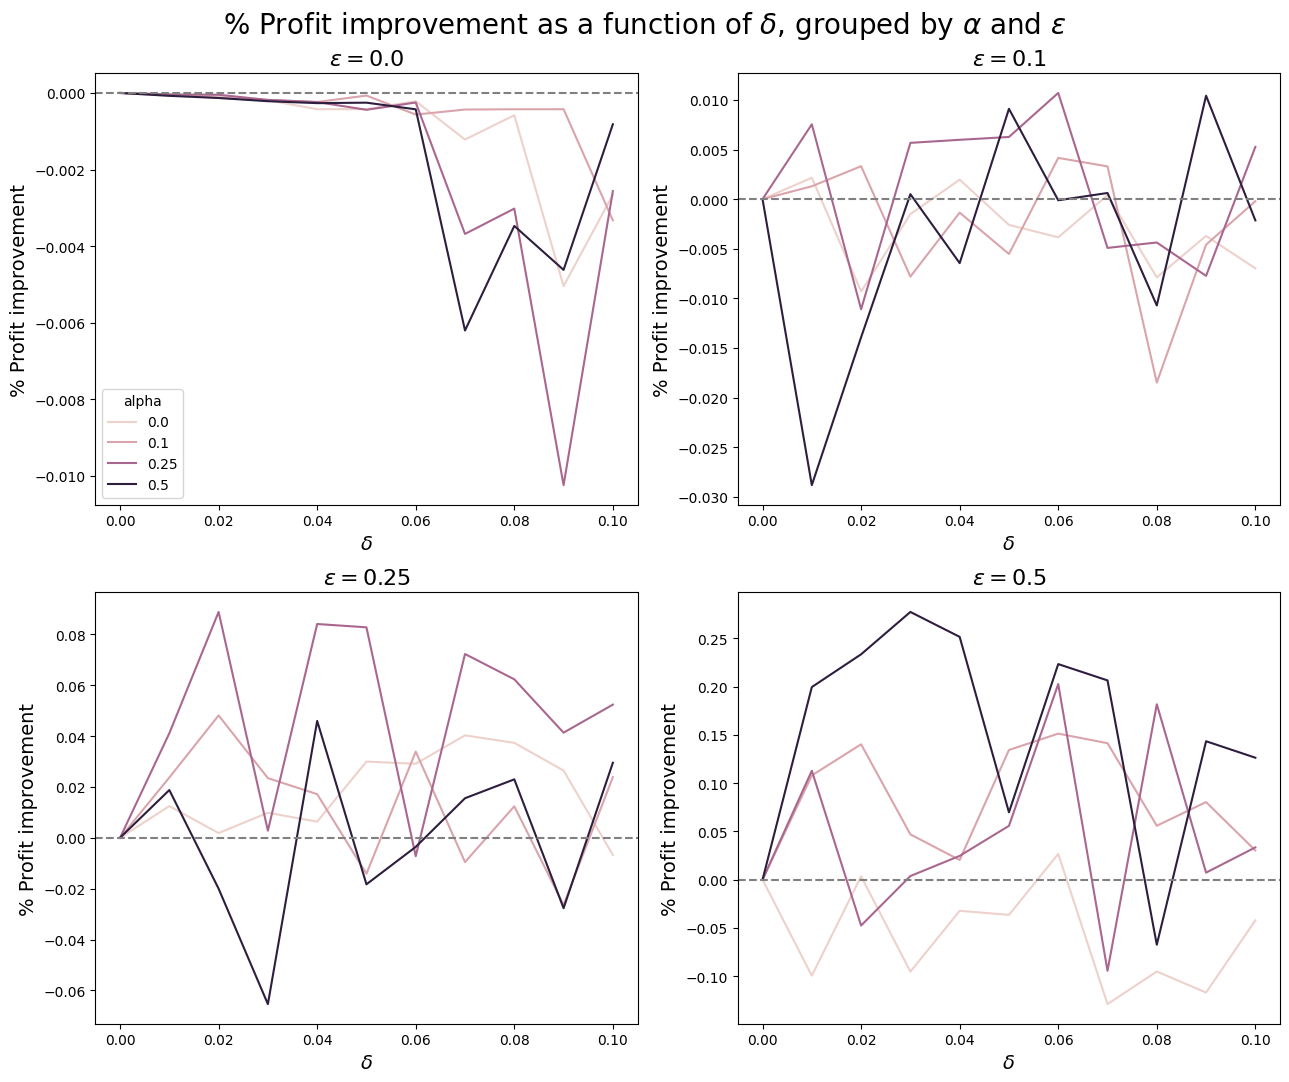

In [5]:
# Create a subplot for each epsilon. Within each subplot, plot x as delta and y as % profit improvement, grouped by alpha
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 11))
for i, epsilon in enumerate(epsilon_range):
    ax = axes[i // 2][i % 2]
    sns.lineplot(x='delta', y='profit_improvement', hue='alpha', data=df[df.epsilon == epsilon], ax=ax, legend='full')
    ax.set_title(f'$\epsilon = {epsilon}$', fontsize=16)
    ax.set_xlabel('$\delta$', fontsize=14)
    ax.set_ylabel('% Profit improvement', fontsize=14)
    if i != 0:
        ax.get_legend().remove()
    ax.axhline(y=0, color='grey', linestyle='--')
fig.suptitle('% Profit improvement as a function of $\delta$, grouped by $\\alpha$ and $\epsilon$', fontsize=20)
fig.tight_layout()
fig.savefig('../output/profit_improvement.png', bbox_inches='tight', dpi=300, pad_inches=0.1)

### Inventory levels

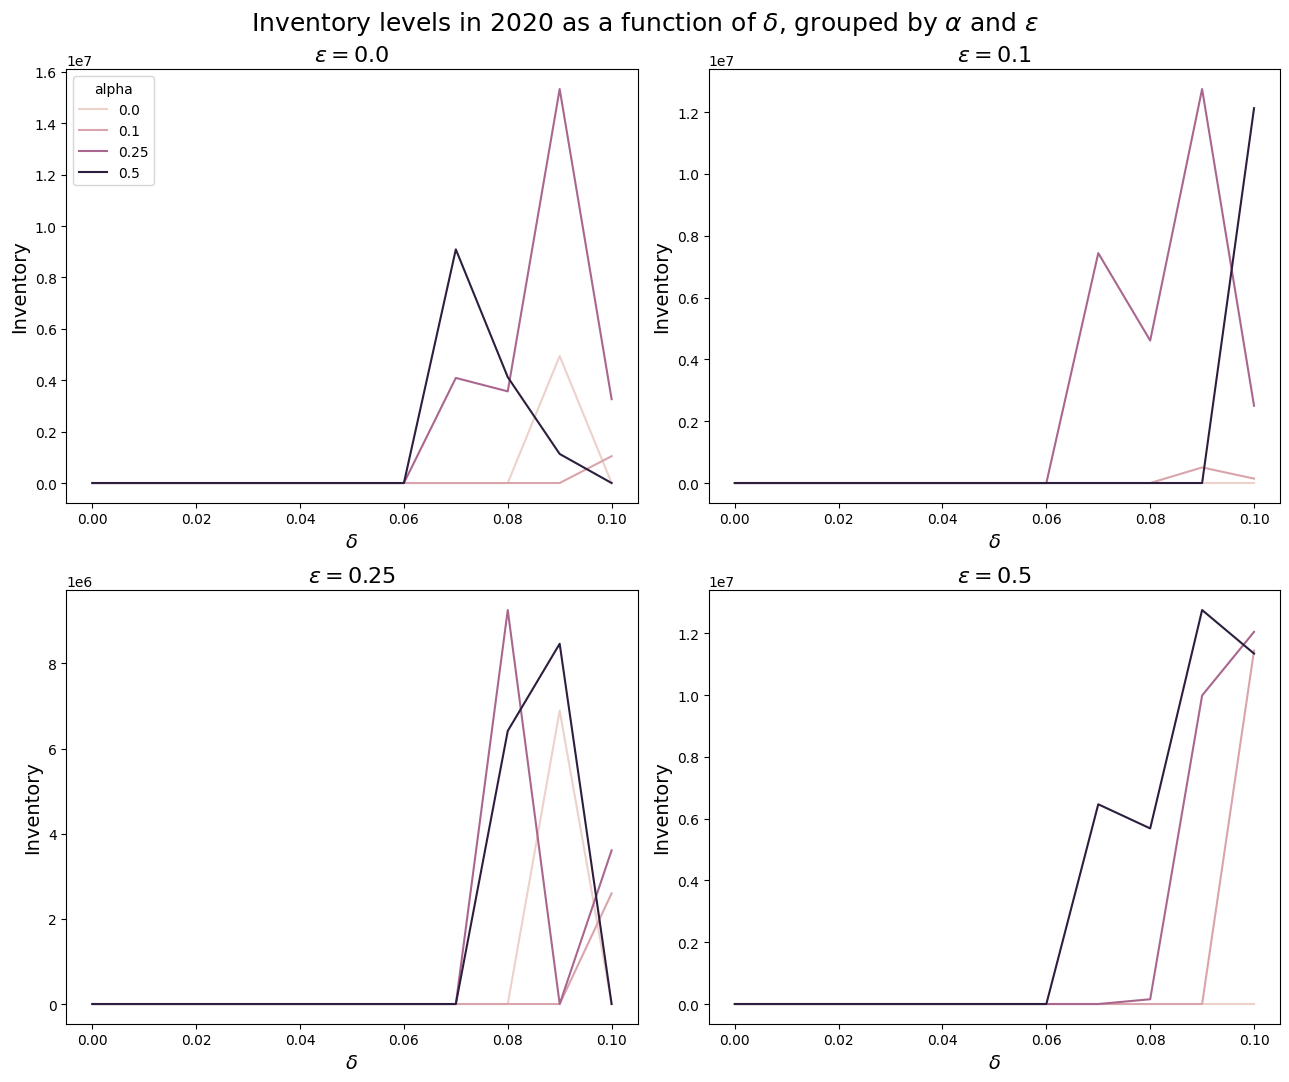

In [6]:
# Create a subplot for each epsilon. Within each subplot, plot x as delta and y as inventory, grouped by alpha
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 11))
for i, epsilon in enumerate(epsilon_range):
    ax = axes[i // 2][i % 2]
    sns.lineplot(x='delta', y='inventory_2020', hue='alpha', data=df[df.epsilon == epsilon], ax=ax, legend='full')
    ax.set_title(f'$\epsilon = {epsilon}$', fontsize=16)
    ax.set_xlabel('$\delta$', fontsize=14)
    ax.set_ylabel('Inventory', fontsize=14)
    if i != 0:
        ax.get_legend().remove()
fig.suptitle('Inventory levels in 2020 as a function of $\delta$, grouped by $\\alpha$ and $\epsilon$', fontsize=18)
fig.tight_layout()
fig.savefig('../output/inventory_2020.png', bbox_inches='tight', dpi=300, pad_inches=0.1)

### Herfindahl

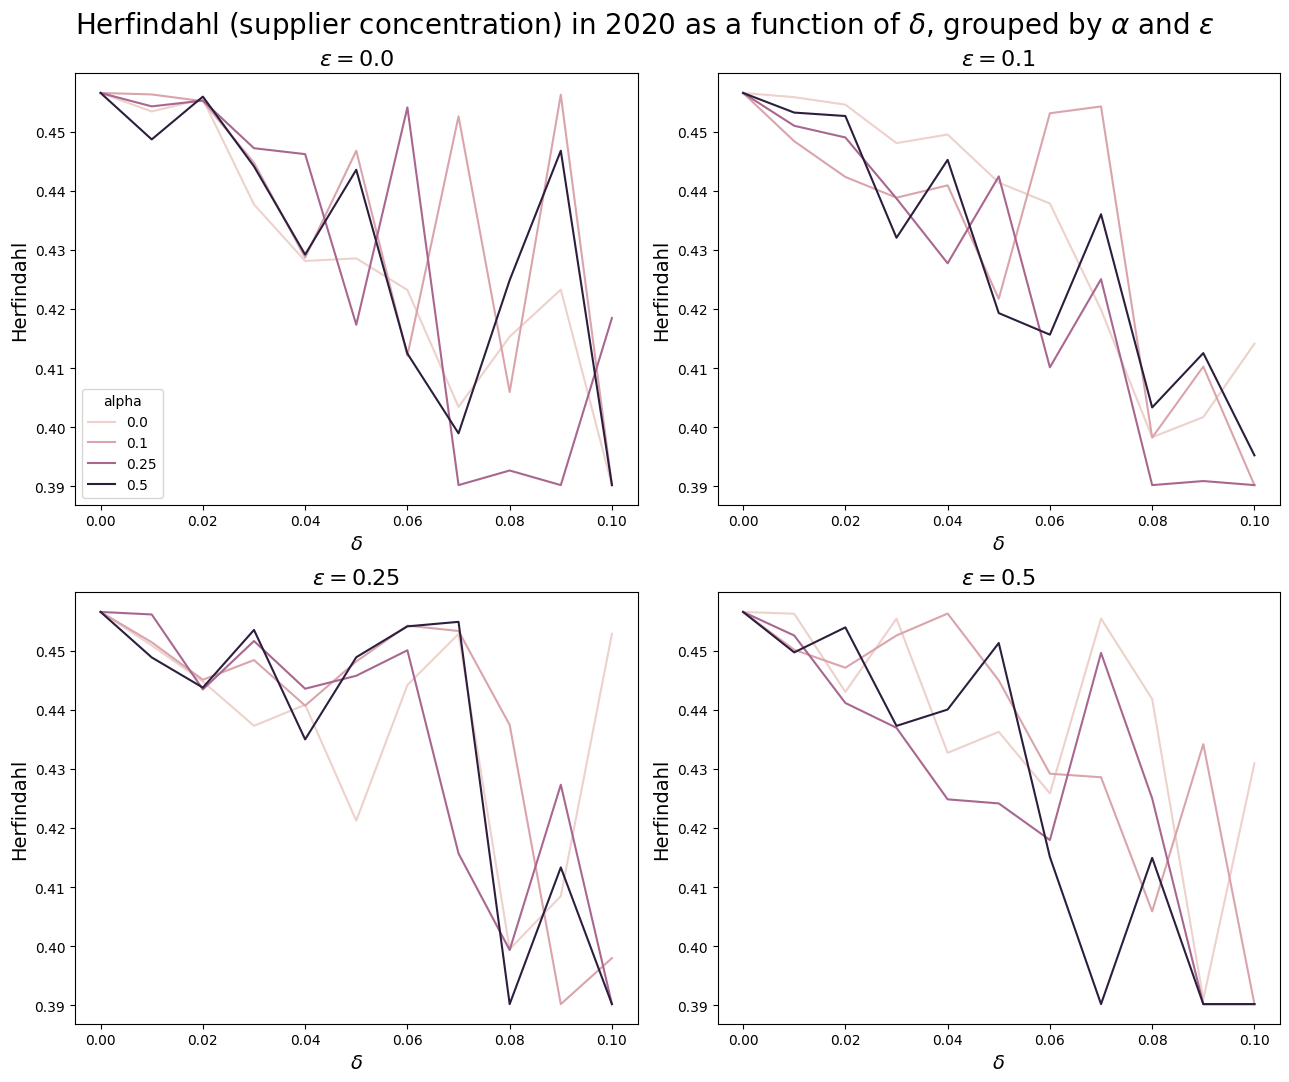

In [7]:
# Create a subplot for each epsilon. Within each subplot, plot x as delta and y as Herfindahls, grouped by alpha
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 11))
for i, epsilon in enumerate(epsilon_range):
    ax = axes[i // 2][i % 2]
    sns.lineplot(x='delta', y='herfindahl_2020', hue='alpha', data=df[df.epsilon == epsilon], ax=ax, legend='full')
    ax.set_title(f'$\epsilon = {epsilon}$', fontsize=16)
    ax.set_xlabel('$\delta$', fontsize=14)
    ax.set_ylabel('Herfindahl', fontsize=14)
    if i != 0:
        ax.get_legend().remove()
fig.suptitle('Herfindahl (supplier concentration) in 2020 as a function of $\delta$, grouped by $\\alpha$ and $\epsilon$', fontsize=20)
fig.tight_layout()
fig.savefig('../output/herfindahl_2020.png', bbox_inches='tight', dpi=300, pad_inches=0.1)